## Exploring Weather Trends 

### Import library

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Import Datasets

In [2]:
# Import city_data.csv into project
city_data = pd.read_csv(r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Udacity\city_data.csv')
city_data

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN
...,...,...,...,...
70787,2009,Zapopan,Mexico,21.76
70788,2010,Zapopan,Mexico,20.90
70789,2011,Zapopan,Mexico,21.55
70790,2012,Zapopan,Mexico,21.52


In [33]:
# Import city_list.csv into project
city_list = pd.read_csv(r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Udacity\city_list.csv')
city_list

,city,country
0,Abidjan,Côte D'Ivoire
1,Abu Dhabi,United Arab Emirates
2,Abuja,Nigeria
3,Accra,Ghana
4,Adana,Turkey
...,...,...
337,Xuzhou,China
338,Yamoussoukro,Côte D'Ivoire
339,Yerevan,Armenia
340,Zagreb,Croatia


In [4]:
# Import global_data.csv into project
global_data = pd.read_csv(r'C:\Users\FORGE-15 I7\OneDrive - AsiaPay Limited\Udacity\global_data.csv')
global_data

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47
...,...,...
261,2011,9.52
262,2012,9.51
263,2013,9.61
264,2014,9.57


### Line Chart

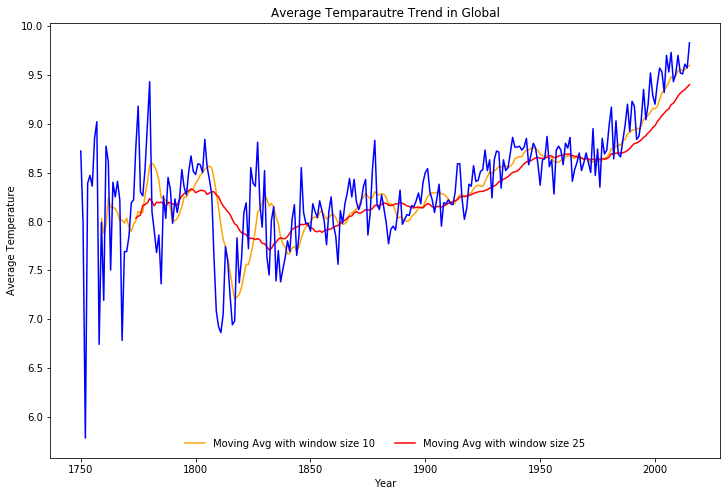

In [70]:
# Moving Average/ Rolling Mean
rolling_mean_10_global = global_data.avg_temp.rolling(window=10).mean()
rolling_mean_25_global = global_data.avg_temp.rolling(window=25).mean()

# Global avg temp trend
plt.figure(figsize=(12,8))
plt.plot(global_data.year, rolling_mean_10_global, color='orange', label='Moving Avg with window size 10')
plt.plot(global_data.year, rolling_mean_25_global, color='red', label='Moving Avg with window size 25')
plt.plot(global_data.year, global_data.avg_temp, color='b')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temparautre Trend in Global')
plt.legend(frameon=False, loc='lower center', ncol=2)
plt.show()

In [40]:
# Extract data for KL
kl_data = city_data[city_data['city'] == 'Kuala Lumpur']
kl_data

,year,city,country,avg_temp
33307,1825,Kuala Lumpur,Malaysia,26.46
33308,1826,Kuala Lumpur,Malaysia,NaN
33309,1827,Kuala Lumpur,Malaysia,NaN
33310,1828,Kuala Lumpur,Malaysia,NaN
33311,1829,Kuala Lumpur,Malaysia,NaN
...,...,...,...,...
33491,2009,Kuala Lumpur,Malaysia,27.47
33492,2010,Kuala Lumpur,Malaysia,27.69
33493,2011,Kuala Lumpur,Malaysia,27.27
33494,2012,Kuala Lumpur,Malaysia,27.36


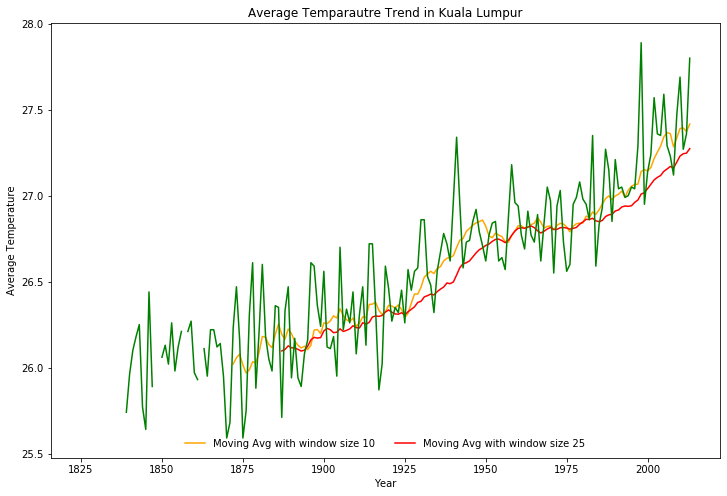

In [71]:
# Moving Average/ Rolling Mean
rolling_mean_10_kl = kl_data.avg_temp.rolling(window=10).mean()
rolling_mean_25_kl = kl_data.avg_temp.rolling(window=25).mean()

# KL avg temp trend
plt.figure(figsize=(12,8))
plt.plot(kl_data.year, rolling_mean_10_kl, color='orange', label='Moving Avg with window size 10')
plt.plot(kl_data.year, rolling_mean_25_kl, color='red', label='Moving Avg with window size 25')
plt.plot(kl_data.year, kl_data.avg_temp, color='g')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temparautre Trend in Kuala Lumpur')
plt.legend(frameon=False, loc='lower center', ncol=2)
plt.show()

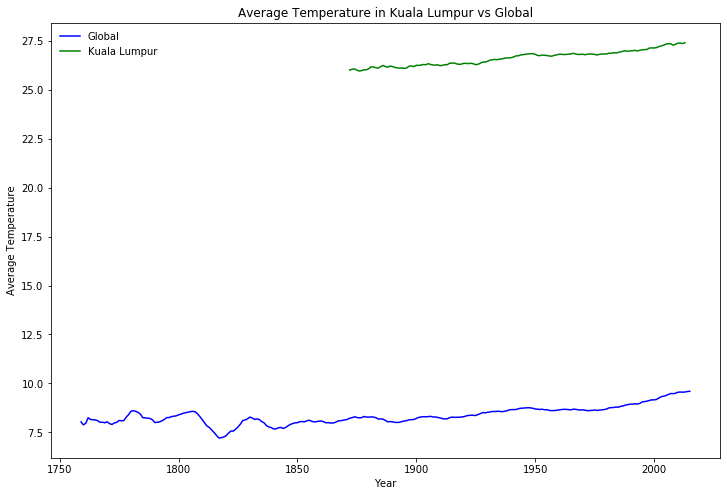

In [72]:
# Global trend vs KL trend
plt.figure(figsize=(12,8))
plt.plot(global_data.year, rolling_mean_10_global, color='b', label='Global')
plt.plot(kl_data.year, rolling_mean_10_kl, color='g', label='Kuala Lumpur')
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature in Kuala Lumpur vs Global')
plt.legend(loc='upper left', frameon=False)
plt.show()

### Correlation Coefficient

In [102]:
# Correlation Coefficient for global data
global_data.corr()

,year,avg_temp
year,1.000000,0.622775
avg_temp,0.622775,1.000000


In [93]:
# Correlation Coefficient for kl data
kl_data.corr()

,year,avg_temp
year,1.000000,0.862513
avg_temp,0.862513,1.000000


In [97]:
# Correlation Coefficient for global data
np.corrcoef(global_data.year, global_data.avg_temp)

array([[1.        , 0.62277451],
       [0.62277451, 1.        ]])

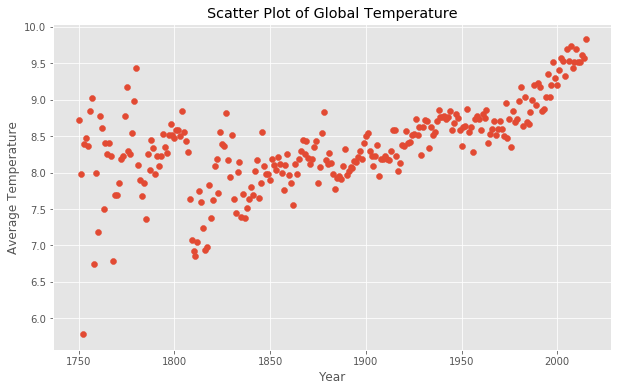

In [185]:
# Scatter Plot for global temperature
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(global_data.year, global_data.avg_temp)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot of Global Temperature')
plt.show()

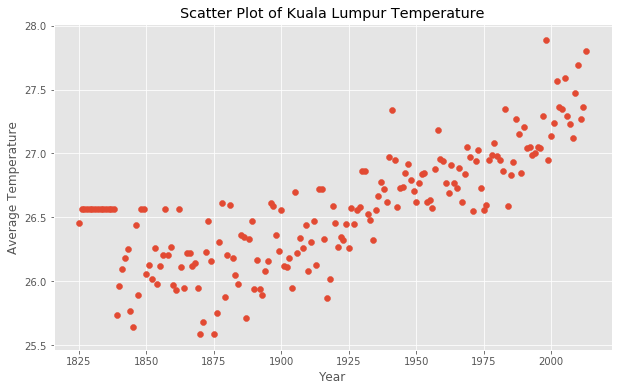

In [186]:
# Scatter Plot for kl temperature
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(kl_data.year, kl_data.avg_temp)
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Scatter Plot of Kuala Lumpur Temperature')
plt.show()

### Prediction

In [174]:
# Split into training set and test shape
x_train, x_test, y_train, y_test = train_test_split(
    global_data.year, global_data.avg_temp, random_state=0)

In [175]:
# Reshape training data
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1)
x_test = x_test.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [176]:
# Logistic Regression
regressor  = LinearRegression()
regressor.fit(x_train, y_train) #training the algorithm

#To retrieve the intercept:
print("Intercept: " + str(regressor.intercept_))

#For retrieving the slope:
print("Slope: " + str(regressor.coef_))

lr_pred = regressor.predict(x_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lr_pred.flatten()})
df

Intercept: [-0.8228906]
Slope: [[0.0048868]]


,Actual,Predicted
0,8.24,8.603752
1,7.72,8.085751
2,8.17,8.520676
3,6.74,7.768108
4,8.70,8.642846
...,...,...
62,8.01,8.134619
63,9.83,9.024017
64,8.25,8.305657
65,7.80,8.168826
